# [Modeling, Data Visualization, and Conclusions Notebook](#'/BavdaConsultingNLPModelingConclusions')

## Table of Contents
   - [Modeling Caution and Methodology](#Modeling-Caution-and-Methodology)
   - [Visualizations and Tables](#Visualizations-and-Tables)
   - [Pipelines, GridsearchCV, and Automated Modeling](#Pipelines,-GridsearchCV,-and-Automated-Modeling)
   - [Conclusions and Recommendations](#Conclusions-and-Recommendations)


#### Imported Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from tqdm import tqdm
from pprint import pprint
%matplotlib inline
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold, train_test_split, cross_validate, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


from nltk import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
lemmatizer =WordNetLemmatizer()
lemmatizer.lemmatize("cats")


'cat'

### [Modeling Caution and Methodology](Modeling-Caution-and-Methodology)

As you can see below, the cleaned data is loaded from the relative path in the Data Folder, The features and the target are defined below. The text is converted to a matrix representation. Methods such as stop words, stemming, and tokenizing are used. Instead of Train, Test, and Split, Cross Validation and KFold are used to sample and split the data for validation and training purposes. Cross Validation Scores and Predictions are used in confusion matrices. 
Three classification models were identified and used in this analysis. K Nearest Neighbors (KNN), Logistic Regression (LR), and Random Forests(RF) were tuned and fed the data. Several iterations were made to determine the best parameters. Moreover, Gridsearching and piping were also used to improve the model.

First, it is important to identify our baseline. This is using the average to predict from our dataset. This is around 50% as the API query for each Google and Apple posts was 3,000. If we can do better, this would suggest success. However, 90% Accuracy has been made the benchmark in this engagement by our client.

Second, it is important to understand how these three models work and their successes and downfalls.

The KNN model is the simplest. This relies on distance. Imagine Apple and Google as separate countries who speak Apple Language and Google Language, respectively. One might have a customer service response that was similar to both. This data would live on the border between Apple where Apple Language is spoken and where Google Language is spoken. This KNN model might be useful in predicting this individual’s language based on where his community was in relation to these different language speakers.  So KNN would look at the distance say where 5 neighbors are included. K, the number of neighbors, could go up and down. If the majority near our observation spoke Apple Language, KNN would predict that our individual speaks Apple Language and vice versa. This type of model is good if we have known data and the decision boundary is strange.  One example of an odd boundary is to consider the distance between two points. Normally, we would say that a line would determine the quickest distance.  However, what if we were in the Loop in Chicago, IL?  All of sudden we have to go around things due to buildings being in the way.  This model was tried in case we had a strange boundary. The results of the data do not reflect such a strange boundary. KNN scored the worst on most of the metrics.

Logistic Regression is more complicated. It is an odd combination of classification and linear regression, which more people are aware of.  Logistic Regression is usually a yes, no or 1, 0 model. In other words, it tells you which class you are in. Thus, it is termed a classification model, mostly. The regression aspect of it is that it could be used to predict the percentage chance of something happening. In other words, you could get the chance from 0 % to 100%. There will be independent variable coefficients that predict the possibility of the dependent variable. The only thing is these coefficients will be the exponent portion of e, a mathematical value like pie. Practically, perhaps, it could be used to predict the result of our language. The mathematically interesting thing about logistic regression is that a logarithm is used to fit a curved figure between 1 and 0.  This is known as the Logit Link Function. It is a binary result-Apple or Google.  However, there are many variables in our model due to the matrix of words. Here though, the independent variables must have a linear relationship with the target. Moreover, there are probably too many features for our data size for this to be useful.  It is highly likely that this model is overfit. Logistic Regression scored second best on most of the metrics discussed below

Finally, Random Forests, a randomized decision tree classfication model is perhaps the most powerful and complicated. As Riley Dallas of General Assembly put it, decision trees work like the game 20 questions.  Each question you ask leads to a new split point until you get to the item you are seeking. Essentially, the computer decides based on the data inputted such as the words used in these posts, which trees minimize error and complexity. So, in decision trees similar to 20 questions, the computer likely  would never ask if the item is a bottle of Gatorade. This is too specific and would make a decision tree more complicated and have more levels. In modeling, this would increase the mean square error for a continuous variable and Gini purity for discrete dependent variable. To minimize error, if we were playing 20 questions, we would start with a broad question that would minimize the number of levels-for example, is the item you are thinking of, living or not? Then one would get more specific. The random part of it is that at different points, the decision tree has random sampling of features to choose from rather than completely minimizing the error. The problem with this model is that while it may predict well on existing data, it has difficulty on new data. In this context, it would only be good at predicting the same type of customer service problems from our dataset.

Please see below the technical aspects. The conclusion provides the model choice and recommendations.

#### Loading Cleaned Data 

In [2]:
df = pd.read_csv('./Data/modeling.csv')

#### Variables have been defined.

In [3]:
features= ['created_utc', 'text', 'num_comments']
target=df['apple']

In [4]:
X=df[features]
y=target

#### Baseline is below. The mean is used as the baseline. 53% of the posts are Google whereas Apple is 47%. If we used the mean to predict our target, we would be right 53% of the time. The goal of this model is to do better than the mean.

In [5]:
1-y.mean()

0.5319969159599075

#### Summary Statistics

In [6]:
X.describe()

,created_utc,num_comments
count,1.297000e+03,1297.000000
mean,1.569593e+09,4.922899
std,9.699154e+06,29.242973
min,1.558282e+09,0.000000
25%,1.560985e+09,0.000000
50%,1.563473e+09,0.000000
75%,1.577296e+09,1.000000
max,1.628782e+09,531.000000


In [7]:
y.describe()

count    1297.000000
mean        0.468003
std         0.499168
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: apple, dtype: float64

#### Preprocessing methods are used below.

In [8]:
ps=PorterStemmer()
df.text=df.text.apply(lambda x : ' '.join([ps.stem(w) for w in word_tokenize(x)]))

In [9]:
df.text

0       appl wi-fi rumor . so a while back i heard app...
1       have anyon notic a massiv drop off in support ...
2       appl is n't listen so i thought i 'd just tri ...
3       upgrad oper system messag . hello , i am a stu...
4       for anyon who recent got a logic board replac ...
                              ...                        
1292    googl timelin issu . for mani month timelin ha...
1293    bill and hillari clinton . i hope i live long ...
1294    safesearch broken . [ http : //support.google....
1295    help me make a list of `` flip-a-switch '' fea...
1296    need help ( softwar engin ) . hi , my name is ...
Name: text, Length: 1297, dtype: object

In [10]:
tfidf= TfidfVectorizer(strip_accents=ascii, lowercase = True,
                       stop_words='english', max_df=100.0,
                        min_df=.01, max_features=250, 
                       norm='l1', sublinear_tf=True) 
tfidf.fit(df.text)
dft= pd.DataFrame(tfidf.transform(df.text).todense(), columns =tfidf.get_feature_names())

In [11]:


df['text'][54]

"my iphon 11 pro 's port is n't ground properli ? option ? . got an iphon 11 pro right befor thanksgiv , and i notic it did someth weird when i plug it in to a dock station via aux cord + dongl : it kept skip forward the song a littl bit at a regular interv , and then siri kept turn on . i brush it off as just someth weird with the plug ( which doe n't make too much sens ) . just now , i had it plug in again , and i notic that when i touch the edg of the phone , the speaker get an interfer sound similar to when you hold the end of a cabl . similarli , i had my forearm slightli touch the edg of the phone , and i felt a small shock ( you can do thi with a connect aux cord too . it 's a veri small shock , but it happen sinc such a small contact point build potenti better ) . thi impli that some of the electr from the aux is go to other part of the phone ( which would explain how it turn siri on . i guess the phone figur the button wa be press ) . are there ani free option to possibl get t

In [12]:
df['num_crossposts'].unique()

array([0])

In [13]:
dft.columns[0:100]

Index(['10', '11', '13', '2019', 'abl', 'access', 'account', 'actual', 'ad',
       'add', 'ago', 'airpod', 'allow', 'alreadi', 'alway', 'amp', 'android',
       'ani', 'anoth', 'anyon', 'anyth', 'app', 'appl', 'apple', 'ask',
       'assist', 'bar', 'batteri', 'becaus', 'befor', 'best', 'better', 'bit',
       'bought', 'button', 'buy', 'ca', 'calendar', 'card', 'case', 'chang',
       'charg', 'check', 'chrome', 'click', 'code', 'com', 'come', 'compani',
       'complet', 'comput', 'connect', 'contact', 'creat', 'current', 'custom',
       'data', 'day', 'delet', 'design', 'develop', 'devic', 'did', 'differ',
       'display', 'doe', 'don', 'download', 'drive', 'els', 'email', 'end',
       'everi', 'everyth', 'experi', 'famili', 'featur', 'feel', 'file', 'fix',
       'game', 'gmail', 'good', 'googl', 'google', 'got', 'great', 'guy', 'ha',
       'happen', 'help', 'hey', 'hi', 'home', 'hope', 'hour', 'howev', 'http',
       'icloud', 'id'],
      dtype='object')

In [14]:
dft.columns[101:200]

Index(['imag', 'includ', 'inform', 'instead', 'io', 'ipad', 'iphon', 'issu',
       'just', 'keyboard', 'know', 'laptop', 'left', 'let', 'life', 'like',
       'link', 'list', 'll', 'locat', 'long', 'look', 'lot', 'mac', 'macbook',
       'make', 'mani', 'map', 'mbp', 'messag', 'mode', 'model', 'money',
       'month', 'music', 'need', 'new', 'news', 'noth', 'notic', 'notif',
       'number', 'offer', 'old', 'onli', 'onlin', 'open', 'option', 'order',
       'page', 'password', 'pay', 'peopl', 'person', 'phone', 'photo', 'pixel',
       'place', 'play', 'pleas', 'plu', 'point', 'possibl', 'post', 'pro',
       'problem', 'product', 'purchas', 'question', 'read', 'realli', 'reason',
       'receiv', 'recent', 'redd', 'releas', 'remov', 'repair', 'replac',
       'result', 'return', 'right', 'run', 'said', 'save', 'say', 'screen',
       'search', 'send', 'sent', 'servic', 'set', 'share', 'sinc', 'site',
       'someon', 'someth', 'start', 'stop'],
      dtype='object')

In [15]:
dft.columns[201:300]

Index(['store', 'suggest', 'support', 'sure', 'switch', 'talk', 'tell', 'text',
       'thank', 'thi', 'thing', 'think', 'thought', 'time', 'today', 'told',
       'track', 'tri', 'turn', 'type', 'u2019', 'u201c', 'u201d', 'updat',
       'upgrad', 'usb', 'use', 'user', 've', 'veri', 'version', 'video', 'wa',
       'wait', 'want', 'watch', 'way', 'websit', 'week', 'went', 'whi',
       'window', 'wonder', 'work', 'wrong', 'www', 'x200b', 'year', 'youtub'],
      dtype='object')

#### Words that would affect the predictor without suggesting customer service are dropped.

In [16]:
dft=dft.drop(['airpod', 'android', 'appl', 'apple', 'chrome','gmail', 'googl', 'google', 'icloud', 'ipad','iphon',\
'macbook', 'mac', 'iphon', 'pixel', 'youtub'], axis=1)


In [17]:
dft['num_comments'] = df.num_comments

In [18]:
XX=dft

In [19]:
#standard scaler
XXX=StandardScaler().fit_transform(XX)

In [20]:
#instantiation
lr=LogisticRegression()
knn= KNeighborsClassifier(n_neighbors=1, weights='uniform', metric='euclidean')
rf=RandomForestClassifier(n_estimators=25, n_jobs=-1)


In [21]:
#Cross val scores
lr_scores = cross_val_score(lr, XXX, y, cv=KFold(n_splits=5, shuffle=True, random_state=42))
knn_scores=cross_val_score(knn, XXX, y, cv=KFold(n_splits=5, shuffle=True, random_state=42))
rf_scores=cross_val_score(rf, XXX, y, cv=KFold(n_splits=5, shuffle=True, random_state=42))

print('logreg', round (lr_scores.mean(), 3), '+-', round (2 *lr_scores.std(), 3))
print('KNN', round (knn_scores.mean(), 3), '+-', round (2 *lr_scores.std(), 3))
print('RF', round (rf_scores.mean(), 3), '+-', round (2 *lr_scores.std(), 3))

logreg 0.756 +- 0.05
KNN 0.655 +- 0.05
RF 0.816 +- 0.05


In [22]:
#dft.value_counts().sort_values()

In [23]:
lrpredictions= cross_val_predict(lr, XXX, y, cv=KFold(n_splits=5, shuffle=True, random_state=42))
knnpredictions= cross_val_predict(knn, XXX, y, cv=KFold(n_splits=5, shuffle=True, random_state=42))
rfpredictions= cross_val_predict(rf, XXX, y, cv=KFold(n_splits=5, shuffle=True, random_state=42))

### [Visualizations and Tables](#Visualizations-and-Tables)



In [24]:
cnf_matrix_lr=metrics.confusion_matrix(y, lrpredictions)
cnf_matrix_lr

array([[528, 162],
       [154, 453]])

Text(0.5, 257.44, 'Predicted label')

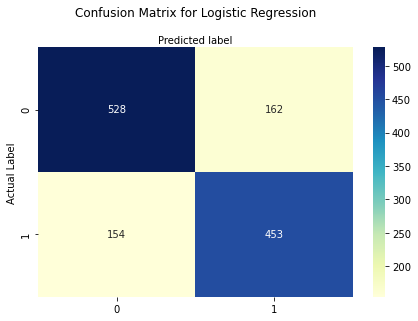

In [25]:
# name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(y))
plt.xticks(tick_marks, y)
plt.yticks(tick_marks, y)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_lr), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix for Logistic Regression', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted label')


In [26]:
print("Accuracy:",metrics.accuracy_score(y, lrpredictions))
print("Precision:",metrics.precision_score(y, lrpredictions))
print("Recall:",metrics.recall_score(y, lrpredictions))
print("F1 Score:", metrics.f1_score(y, lrpredictions))

Accuracy: 0.756360832690825
Precision: 0.7365853658536585
Recall: 0.7462932454695222
F1 Score: 0.7414075286415712


In [27]:
cnf_matrix_knn=metrics.confusion_matrix(y, knnpredictions)
cnf_matrix_knn

array([[389, 301],
       [147, 460]])

Text(0.5, 257.44, 'Predicted label')

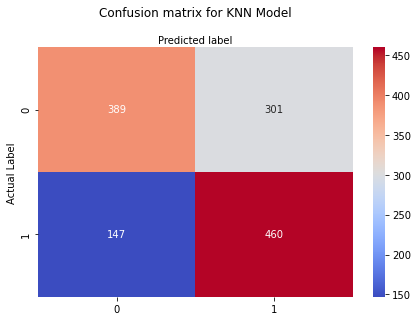

In [28]:
# name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(y))
plt.xticks(tick_marks, y)
plt.yticks(tick_marks, y)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_knn), annot=True, cmap="coolwarm" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for KNN Model', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted label')

In [29]:
print("Accuracy:",metrics.accuracy_score(y, knnpredictions))
print("Precision:",metrics.precision_score(y, knnpredictions))
print("Recall:",metrics.recall_score(y, knnpredictions))
print("F1 Score:", metrics.f1_score(y, knnpredictions))

Accuracy: 0.6545875096376252
Precision: 0.6044678055190539
Recall: 0.7578253706754531
F1 Score: 0.672514619883041


In [30]:
cnf_matrix_lr=metrics.confusion_matrix(y, lrpredictions)
cnf_matrix_lr

array([[528, 162],
       [154, 453]])

In [31]:
cnf_matrix_rf=metrics.confusion_matrix(y, rfpredictions)
cnf_matrix_rf

array([[570, 120],
       [133, 474]])

Text(0.5, 257.44, 'Predicted')

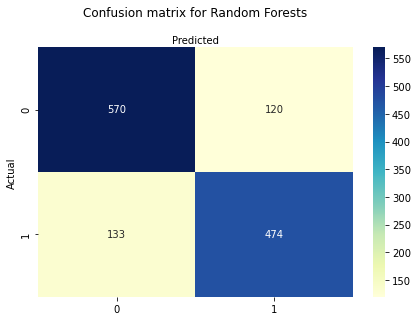

In [32]:
# name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(y))
plt.xticks(tick_marks, y)
plt.yticks(tick_marks, y)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_rf), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Random Forests', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [33]:
print("Accuracy:",metrics.accuracy_score(y, rfpredictions))
print("Precision:",metrics.precision_score(y, rfpredictions))
print("Recall:",metrics.recall_score(y, rfpredictions))
print("F1 Score:", metrics.f1_score(y, rfpredictions))

Accuracy: 0.8049344641480339
Precision: 0.797979797979798
Recall: 0.7808896210873146
F1 Score: 0.7893422148209825


In [34]:
# tell spaCy to use the english language
nlp = spacy.load('en_core_web_sm')
# add sentiment analysis to your pipeline
nlp.add_pipe("spacytextblob")

In [35]:
df['polarity']=[nlp(word)._.polarity for word in df['text']]

In [36]:
df['subjectivity']=[nlp(word)._.subjectivity for word in df['text']]

In [37]:
df['assessment']=[nlp(word)._.assessments for word in df['text']]

In [38]:
print('RF', round (rf_scores.mean(), 3), '+-', round (2 *lr_scores.std(), 3))

RF 0.816 +- 0.05


Apple Mean Polarity:
0.093
Apple Median Polarity:
0.067


(None, None, None, None, <AxesSubplot:>)

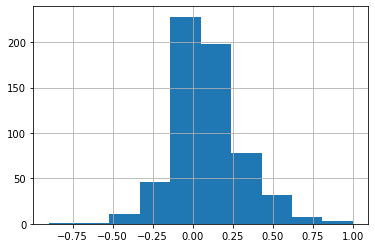

In [39]:
print('Apple Mean Polarity:'), print(round(df['polarity'][0:606].mean(), 3)), print('Apple Median Polarity:'), print(round(df['polarity'][0:606].median(), 3)), df['polarity'][0:606].hist()

Google Mean Polarity
0.05
Google Median Polarity
0.0


(None, None, None, None, <AxesSubplot:>)

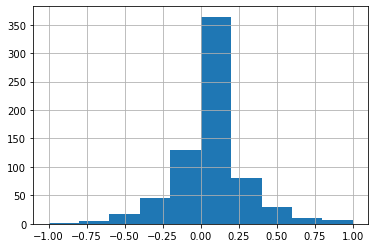

In [40]:
print('Google Mean Polarity'), print(round(df['polarity'][607:1297].mean(), 3)), print('Google Median Polarity'), print(round(df['polarity'][607:1297].median(), 3)), df['polarity'][607:1297].hist()

(0.38313952134404256, 0.40603592314118625, <AxesSubplot:>)

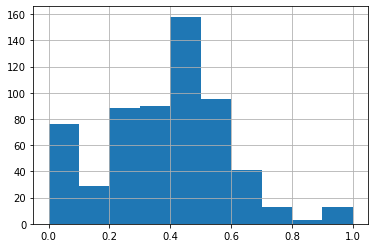

In [41]:
df['subjectivity'][0:606].mean(), df['subjectivity'][0:606].median(), df['subjectivity'][0:606].hist()

(0.36887178879182836, 0.38988095238095233, <AxesSubplot:>)

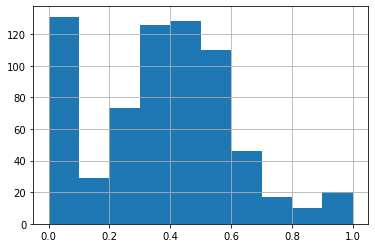

In [42]:
df['subjectivity'][607:1297].mean(), df['subjectivity'][607:1297].median(), df['subjectivity'][607:1297].hist()

(apple
 0    0.368872
 1    0.383384
 Name: subjectivity, dtype: float64,
 apple
 0    0.389881
 1    0.406151
 Name: subjectivity, dtype: float64,
 apple
 0    AxesSubplot(0.125,0.125;0.775x0.755)
 1    AxesSubplot(0.125,0.125;0.775x0.755)
 Name: subjectivity, dtype: object)

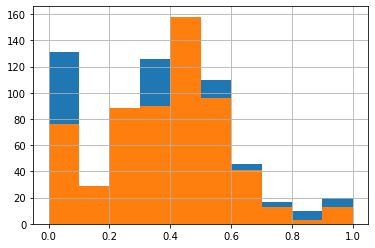

In [43]:
df.groupby(['apple'])['subjectivity'].mean(), df.groupby(['apple'])['subjectivity'].median(), df.groupby(['apple'])['subjectivity'].hist()


(apple
 0    0.049940
 1    0.092758
 Name: polarity, dtype: float64,
 apple
 0    0.000000
 1    0.066667
 Name: polarity, dtype: float64,
 apple
 0    AxesSubplot(0.125,0.125;0.775x0.755)
 1    AxesSubplot(0.125,0.125;0.775x0.755)
 Name: polarity, dtype: object)

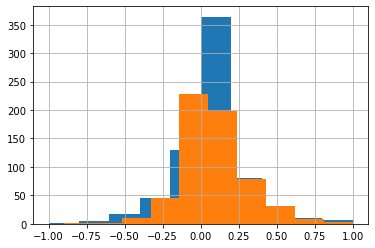

In [44]:
df.groupby(['apple'])['polarity'].mean(), df.groupby(['apple'])['polarity'].median(), df.groupby(['apple'])['polarity'].hist() 

Apple Mean Polarity:
0.093
Apple Median Polarity:
0.067


(None, None, None, None, <AxesSubplot:>)

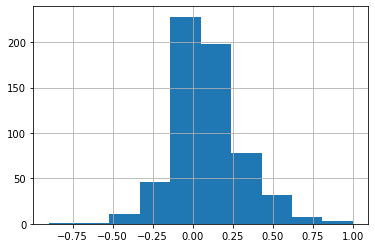

In [45]:
print('Apple Mean Polarity:'), print(round(df['polarity'][0:606].mean(), 3)), print('Apple Median Polarity:'), print(round(df['polarity'][0:606].median(), 3)), df['polarity'][0:606].hist()

### [Pipelines, GridsearchCV, and Automated Modeling](#Pipelines,-GridsearchCV,-and-Automated-Modeling)

#### This is where the parameters were created for each of the three models.

In [46]:
params1={'tfidf__strip_accents':[ascii], 'tfidf__lowercase':[True],\
         
'tfidf__stop_words':['english'], 'tfidf__max_df':[10, 20, 50, 100, 150, 200],\

'tfidf__min_df':[.01, .05, .1, .5, 1], 'tfidf__max_features':[50, 150, 250, 300, 350],\

'tfidf__norm':['l1'], 'tfidf__sublinear_tf':[True], 'lr__penalty':['l1', 'l2']}


params2={'tfidf__strip_accents':[ascii], 'tfidf__lowercase':[True],\
         
'tfidf__stop_words':['english'], 'tfidf__max_df':[10, 20, 50, 100, 150, 200],\
         
'tfidf__min_df':[.01, .05, .1, .5, 1], 'tfidf__max_features':[50, 150, 200, 300, 350],\
         
'tfidf__norm':['l1'], 'tfidf__sublinear_tf':[True], 'knn__n_neighbors':range(1, 51, 10), \
         
'knn__weights':['uniform', 'distance'], 'knn__metric':['euclidean','manhattan']}


params3={'tfidf__strip_accents':[None, ascii], 'tfidf__lowercase':[False, True],\
         
'tfidf__stop_words':[None, 'english'], 'tfidf__max_df':[10, 20, 50, 100, 150, 200],\
         
'tfidf__min_df':[.01, .05, .1, .5, 1], 'tfidf__max_features':[50, 150, 250, 300, 350],\
         
'tfidf__norm':['l1'], 'tfidf__sublinear_tf':[False, True], 'rf__max_depth': [range(1,20, 5)],\

'rf__min_samples_leaf':[range(1,15, 5)], 'rf__n_estimators':[25, 50, 100, 200]}


#### The Pipelines are instantiated, and the GridsearchCV is run. Parameters had to be reduced to prevent a crash of the notebook.

In [47]:
pipelr=Pipeline([('tfidf', TfidfVectorizer()), ('ss', StandardScaler()), ('lr', LogisticRegression())])
pipeknn=Pipeline([('tfidf', TfidfVectorizer()), ('ss', StandardScaler()), ('knn', KNeighborsClassifier())])
piperf=Pipeline([('tfidf', TfidfVectorizer()), ('ss', StandardScaler()), ('rf', RandomForestClassifier())])

In [48]:
#pipelrgrid=GridSearchCV(pipelr, param_grid=params1, cv=5)
#pipelrgrid.fit(X,y)

In [49]:
#print(pipelrgrid.best_score_)
#print(pipelrgrid.best_estimator_)
#print(pipelrgrid.best_params_)

In [50]:
#pipeknngrid=GridSearchCV(pipeknn, param_grid=params2, cv=5)
#pipeknngrid.fit(X,y)

In [51]:
#print(pipeknngrid.best_score_)
#print(pipeknngrid.best_estimator_)
#print(pipeknngrid.best_params_)

In [52]:
#piperfgrid=GridSearchCV(piperf, param_grid=params3, cv=5)
#piperfgrid.fit(X,y)

In [53]:
#print(piperfgrid.best_score_)
#print(piperfgrid.best_estimator_)
#print(piperfgrid.best_params_)

### [Conclusions and Recommendations](#Conclusions-and-Recommendations)

As the introduction explains, Mr. Amir Payeebaj of ANEC-NOC has hired Bavda Consulting to develop a model in a multi-part project to analyze the customer service of Apple and Google to help choose whose model of customer service ANEC-NOC will emulate. In the engagement letter, targeting the readers of Reddit was deemed important. While part two of this project will be to poll and engage focus groups to better assess sentiment, I have targeted the subreddits for Apple and Google and queried customer service related posts to analyze. There are two key recommendations Bavda Consulting can make. First, there is a production model recommendation, Second, there is a usage recommendation.

As a caution, Gridsearching was used to tune parameters. However, keywords such as Google and Apple were included in the parameters it chose. To improve upon this model, the relevant key words should have been added to the corpus of the stop words to prevent GridSearch from identifying those words from the matrices. This would allow GridSearch to be more useful. Moreover, the polling and focus groups that will be used used in Part 2 of this project will provide, with this model, a better context to help ANEC-NOC. With and without Gridsearch, several runs were made to determine the best parameters and models. The data above and explanation below use the best of it. It should be noted that Bavda Consulting has not met the metric of .90 accuracy as requested by ANEC-NOC.

#### Production Model Recommendation

The production model chosen is Random Forests for several reasons. First, the Cross Validation Score, Accuracy, Precision, Recall, and F1 Score were the highest for Random Forests above its competitors. As the visualizations in the confusion matrices and classification metric tables show, these scores makes a strong case. Logistic Regression is its only competitor based on these scores. KNN is well below the other two. 

Second, Logistic Regression and Random Forests are within each other's confidence interval. However, given the number of features used and the data size, the Logistic Regression model may be overfit and not generalize well to new data. Normally, Random Forests is typically overfit. Given that they both have the same drawback, Random Forest shows higher scores, suggesting it is better fit. 

Third, Logistic Regression assumes a linear relationship even if a log is used.  Given that language is not necessarily linear, this violates Logistic Regression's assumptions. Without more contextual data and reasoning, logistic regression may lead you on the wrong path.

Fourth, conceptually, Random Forests's algorithm of a decision tree may more accurately reflect the algorithm of someone getting customer service. If the computer is essentially playing 20 questions, this is how people would describe their customer service experience narratives in language. They usually start with someone who tries to narrow down where the customer would go like the decision tree. The end is satisfiaction or dissatisfaction. 

    Cross Validation Score  Accuracy          Precision         Recall       F1 Score
LR---0.756 +- 0.05---------------------0.756---------------------0.736---------------------0.746--------------0.741

KNN-0.655 +- 0.05---------------------0.654---------------------0.604---------------------0.757--------------0.672

RF---0.805 +- 0.05---------------------0.808---------------------0.801---------------------0.785------------- 0.793





#### Model Usage Recommendation

The first recommendation is based off a polarity analysis that was done above.  A polarity analysis is how positive or negative a group of text is. If one looks at the histogram of Google and Apple subreddits above, they nearly overlap each other. The measures of central tendency, meaning mean and median, are relatively close. Given this similarity, it may be that both Apple and Google are good models to follow. Perhaps combining their strategies might be the best for your company.

The second recommendation is that instead of trying to see whether Apple or Google have a better model, focus on your customers. It may be that Apple is good for its customers, and Google is good for its customers. Finding out what your company's customers like may be key to determining whom you should imitate. Using the Random Forests model developed, Logistic Regression model in combination, or all three models averaged, enter you company's highly satisfied subreddit posts and see whether the model predicts Google or Apple. By identifying your customers' needs and desires, this model could guide you to which company to imitate. Moreover, you can identify other subreddits that contain customers you would like to seek. Use their subreddit posts as the independent variable to determine whether Google or Apple's model is most similar and better for you.

The third recommendation is to gather additional data over time for several reasons. First, the forked and cloned copy of all these documents that you now have contains an automated API function. This will allow you to see if customers' tastes have changed. This will allow the model more training data to hone in on your target. Given larger amounts of data, both the random forest and logistic regression model that you now have may contain enough data to generalize better than now. Moreover, by identifying the coefficients on a better logistic regression model, these key words may guide you on the most important language. By holding all else constant, each coefficient (remember this is logged) will give you the contribution towards the model picked.

This completes our analysis, conclusion, and recommendations. Please contact Bavda Consulting with any questions, suggestions and comments.